In [1]:
import sys
sys.path.append("../../..")

import helper as hlp
import pandas as pd
import numpy as np

[nltk_data] Downloading package stopwords to C:\Users\Abdul
[nltk_data]     Manaf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
EPOCHS = 50
MAX_LEN = 30
N_CLASSES = 5
BATCH_SIZE = 128
LEARNING_RATE = 2e-5
NAME = 'distil(roberta)-sindhi'
MODEL_NAME = 'distilroberta-base'
dir = '../../../../Dataset Statistics/dataset'
path = f'../saved_models/{NAME}'
class_names = ['Disability', 'Gender/Sexual', 'Origin/Nationality', 'Race/Ethnicity', 'Religion']

In [3]:
train_df = pd.read_csv(f'{dir}/train.csv')
val_df = pd.read_csv(f'{dir}/val.csv')
test_df = pd.read_csv(f'{dir}/test.csv')

train_df = train_df[train_df['class'] != 0]
val_df = val_df[val_df['class'] != 0]
test_df = test_df[test_df['class'] != 0]

train_texts = train_df['sindhi_text'].values
val_texts = val_df['sindhi_text'].values
test_texts = test_df['sindhi_text'].values

train_labels = train_df[class_names].values
val_labels = val_df[class_names].values
test_labels = test_df[class_names].values

In [4]:
#show 5 values along with their labels
for i in range(5):
    print(train_texts[i], train_labels[i])

توهان ڪير ڄاڻو ٿا ته موجون گهٽ لڙ ۾ ٺاهيندا آهن?  dbo’d yo bitch هاڻي هوءَ اسان جي ٻنهي (nigga) [0 0 0 1 0]
اها ڪچي مڪمل نظر اچي ٿي https://t.co/L17zFSuqGQ [0 1 0 0 0]
اسان هاڻي سڀني پليٽ فارمن تي آهيون، تنهنڪري ايندڙ ڀيري توهان هڪ خراب ڪچي، هڪ خوبصورت عورت، جيڪو توهان چاهيو ٿا. راند ڪريو FIHTEEN ته جيئن هوء توهان کي مختلف ڄاڻي سگهي [0 1 0 0 0]
بس هڪ وار ڪٽيو، ڪو به مون کي منهنجي ڪچي مان وٺي سگهي ٿو [0 1 0 0 0]
@barnlife5 @realShawNshawN @grantstern جيڪڏهن توهان سڀ ڪجهه محسوس ڪيو ته پوءِ اهو ڪريو.  ٽرمپ وٽ بالز آهن جيڪي ڪرڻ لاءِ جمهوريت پسند چاهين ٿا ته اهي ڪري سگهن.  پر لبرل ۽ جمهوريت پسند نرم آهن ۽ منسوخ ٿيڻ کان خوفزده آهن يا اهي پري کاٻي پاسي نه جهڪندا آهن!! 😂😂Y' سڀ گونگا آهن جيئن ته اهو مزاحيه آهي [0 0 0 1 0]


In [5]:
#show 5 values along with their labels
for i in range(5):
    print(hlp.preprocess_text(train_texts[i], language="sindhi")
    , train_labels[i])

ڄاڻو ٿا ته موجون گهٽ لڙ ۾ ٺاهيندا dbo’d yo bitch هاڻي هوءَ اسان جي ٻنهي nigga [0 0 0 1 0]
اها ڪچي مڪمل نظر اچي ٿي [0 1 0 0 0]
اسان هاڻي سڀني پليٽ فارمن آهيون، تنهنڪري ايندڙ ڀيري خراب ڪچي، خوبصورت عورت، جيڪو چاهيو ٿا راند ڪريو fihteen ته هوء کي ڄاڻي سگهي [0 1 0 0 0]
بس وار ڪٽيو، ڪو مون کي منهنجي ڪچي وٺي سگهي ٿو [0 1 0 0 0]
barnlife5 realshawnshawn grantstern جيڪڏهن سڀ ڪجهه محسوس ڪيو ته پوءِ ڪريو ٽرمپ وٽ بالز جيڪي لاءِ جمهوريت پسند چاهين ٿا ته ڪري سگهن پر لبرل جمهوريت پسند نرم منسوخ کان خوفزده يا پري کاٻي نه جهڪندا 😂😂y سڀ گونگا ته مزاحيه آهي [0 0 0 1 0]


In [6]:
## apply preprocessing to all texts
train_texts = [hlp.preprocess_text(text, language="sindhi") for text in train_texts]
val_texts = [hlp.preprocess_text(text, language="sindhi") for text in val_texts]
test_texts = [hlp.preprocess_text(text, language="sindhi") for text in test_texts]

In [7]:
## mbert model and tokenizer
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=N_CLASSES)
optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE)
model = model.to(device)

c:\Users\Abdul Manaf\AppData\Local\Programs\Python\Python39\lib\site-packages\huggingface_hub\utils\_runtime.py:184: UserWarning: Pydantic is installed but cannot be imported. Please check your installation. `huggingface_hub` will default to not using Pydantic. Error message: '{e}'
  warnings.warn(
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at distilroberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [8]:
train_data_loader = hlp.create_data_loader(train_texts, train_labels, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = hlp.create_data_loader(val_texts, val_labels, tokenizer, MAX_LEN, BATCH_SIZE)

history = hlp.train_model_multi(train_data_loader, val_data_loader, model, optimizer, device, EPOCHS, tokenizer, path)

Epoch 0/50
----------


Training Progress: 100%|██████████| 241/241 [00:54<00:00,  4.46it/s, loss=0.241]


Train loss 0.3200898446853725 accuracy 0.4100780234070221
Validation loss 0.23541838390591704 accuracy 0.5652428320655354
Model and tokenizer saved at epoch 0
Checkpoint saved: Improved validation accuracy at epoch 0: 0.5652428320655354
Epoch 1/50
----------


Training Progress: 100%|██████████| 241/241 [00:50<00:00,  4.75it/s, loss=0.221]


Train loss 0.22825166335739042 accuracy 0.5888166449934981
Validation loss 0.21910470484951397 accuracy 0.5947922761849035
Model and tokenizer saved at epoch 1
Checkpoint saved: Improved validation accuracy at epoch 1: 0.5947922761849035
Epoch 2/50
----------


Training Progress: 100%|██████████| 241/241 [00:50<00:00,  4.76it/s, loss=0.195]


Train loss 0.21173990953760027 accuracy 0.6156371911573472
Validation loss 0.21041798021322417 accuracy 0.6179052077238151
Model and tokenizer saved at epoch 2
Checkpoint saved: Improved validation accuracy at epoch 2: 0.6179052077238151
Epoch 3/50
----------


Training Progress: 100%|██████████| 241/241 [00:50<00:00,  4.77it/s, loss=0.17] 


Train loss 0.19974404561074444 accuracy 0.6443433029908973
Validation loss 0.21328582697444493 accuracy 0.6453091476496977
Model and tokenizer saved at epoch 3
Checkpoint saved: Improved validation accuracy at epoch 3: 0.6453091476496977
Epoch 4/50
----------


Training Progress: 100%|██████████| 241/241 [00:51<00:00,  4.64it/s, loss=0.155]


Train loss 0.18945841432483365 accuracy 0.6693758127438232
Validation loss 0.21116376861377997 accuracy 0.6688121708601521
Model and tokenizer saved at epoch 4
Checkpoint saved: Improved validation accuracy at epoch 4: 0.6688121708601521
Epoch 5/50
----------


Training Progress: 100%|██████████| 241/241 [00:51<00:00,  4.71it/s, loss=0.147]


Train loss 0.17885360804954506 accuracy 0.696814044213264
Validation loss 0.21845770802026915 accuracy 0.6873415252584357
Model and tokenizer saved at epoch 5
Checkpoint saved: Improved validation accuracy at epoch 5: 0.6873415252584357
Epoch 6/50
----------


Training Progress: 100%|██████████| 241/241 [00:50<00:00,  4.79it/s, loss=0.151]


Train loss 0.17043683334752238 accuracy 0.7177828348504551
Validation loss 0.21415309092880766 accuracy 0.6801248293348937
No improvement in validation accuracy for 1 epochs.
Epoch 7/50
----------


Training Progress: 100%|██████████| 241/241 [00:50<00:00,  4.74it/s, loss=0.145] 


Train loss 0.16146558028533745 accuracy 0.7364109232769831
Validation loss 0.23964264381814887 accuracy 0.6770040959625512
No improvement in validation accuracy for 2 epochs.
Epoch 8/50
----------


Training Progress: 100%|██████████| 241/241 [00:50<00:00,  4.77it/s, loss=0.131] 


Train loss 0.1544360642425747 accuracy 0.7521456436931079
Validation loss 0.22903180655873853 accuracy 0.6903647357128925
Model and tokenizer saved at epoch 8
Checkpoint saved: Improved validation accuracy at epoch 8: 0.6903647357128925
Epoch 9/50
----------


Training Progress: 100%|██████████| 241/241 [00:52<00:00,  4.56it/s, loss=0.119] 


Train loss 0.14555163613493513 accuracy 0.7688556566970091
Validation loss 0.24759325992178033 accuracy 0.697776477472206
Model and tokenizer saved at epoch 9
Checkpoint saved: Improved validation accuracy at epoch 9: 0.697776477472206
Epoch 10/50
----------


Training Progress: 100%|██████████| 241/241 [00:55<00:00,  4.34it/s, loss=0.114] 


Train loss 0.1381349986828709 accuracy 0.783257477243173
Validation loss 0.26068439454208187 accuracy 0.7009947337624342
Model and tokenizer saved at epoch 10
Checkpoint saved: Improved validation accuracy at epoch 10: 0.7009947337624342
Epoch 11/50
----------


Training Progress: 100%|██████████| 241/241 [00:55<00:00,  4.32it/s, loss=0.107] 


Train loss 0.13400121206317206 accuracy 0.7890117035110533
Validation loss 0.2522912448571052 accuracy 0.6938755607567778
No improvement in validation accuracy for 1 epochs.
Epoch 12/50
----------


Training Progress: 100%|██████████| 241/241 [00:51<00:00,  4.66it/s, loss=0.148] 


Train loss 0.13062780047477032 accuracy 0.7956436931079324
Validation loss 0.2595043852005476 accuracy 0.6959235420323776
No improvement in validation accuracy for 2 epochs.
Epoch 13/50
----------


Training Progress: 100%|██████████| 241/241 [00:50<00:00,  4.75it/s, loss=0.102] 


Train loss 0.12238732168906952 accuracy 0.8078673602080624
Validation loss 0.26811325126959956 accuracy 0.695143358689292
No improvement in validation accuracy for 3 epochs.
Epoch 14/50
----------


Training Progress: 100%|██████████| 241/241 [00:50<00:00,  4.76it/s, loss=0.0957]


Train loss 0.11845789985785346 accuracy 0.8163849154746424
Validation loss 0.2810708208952421 accuracy 0.6979715233079774
No improvement in validation accuracy for 4 epochs.
Epoch 15/50
----------


Training Progress: 100%|██████████| 241/241 [00:50<00:00,  4.76it/s, loss=0.0806]


Train loss 0.11485689117948049 accuracy 0.8250325097529259
Validation loss 0.2719957293183715 accuracy 0.7114296859762044
Model and tokenizer saved at epoch 15
Checkpoint saved: Improved validation accuracy at epoch 15: 0.7114296859762044
Epoch 16/50
----------


Training Progress: 100%|██████████| 241/241 [00:51<00:00,  4.72it/s, loss=0.0881]


Train loss 0.1109070758880174 accuracy 0.8283485045513654
Validation loss 0.26596756518622977 accuracy 0.7228398673688317
Model and tokenizer saved at epoch 16
Checkpoint saved: Improved validation accuracy at epoch 16: 0.7228398673688317
Epoch 17/50
----------


Training Progress: 100%|██████████| 241/241 [00:50<00:00,  4.82it/s, loss=0.0787]


Train loss 0.10699376813232651 accuracy 0.8371586475942783
Validation loss 0.27952689134780273 accuracy 0.7267407840842598
Model and tokenizer saved at epoch 17
Checkpoint saved: Improved validation accuracy at epoch 17: 0.7267407840842598
Epoch 18/50
----------


Training Progress: 100%|██████████| 241/241 [00:51<00:00,  4.65it/s, loss=0.0813]


Train loss 0.10208365767885046 accuracy 0.8462613784135241
Validation loss 0.29063019505989407 accuracy 0.7296664716208309
Model and tokenizer saved at epoch 18
Checkpoint saved: Improved validation accuracy at epoch 18: 0.7296664716208309
Epoch 19/50
----------


Training Progress: 100%|██████████| 241/241 [00:51<00:00,  4.72it/s, loss=0.0785]


Train loss 0.09837931368299045 accuracy 0.8538686605981795
Validation loss 0.2837537368874491 accuracy 0.7271308757558026
No improvement in validation accuracy for 1 epochs.
Epoch 20/50
----------


Training Progress: 100%|██████████| 241/241 [00:52<00:00,  4.58it/s, loss=0.0747]


Train loss 0.09587468257892676 accuracy 0.8566970091027308
Validation loss 0.2874782164523631 accuracy 0.7321045445679735
Model and tokenizer saved at epoch 20
Checkpoint saved: Improved validation accuracy at epoch 20: 0.7321045445679735
Epoch 21/50
----------


Training Progress: 100%|██████████| 241/241 [00:50<00:00,  4.79it/s, loss=0.0665]


Train loss 0.09145780252408685 accuracy 0.8626788036410923
Validation loss 0.3053402924611245 accuracy 0.7292763799492881
No improvement in validation accuracy for 1 epochs.
Epoch 22/50
----------


Training Progress: 100%|██████████| 241/241 [00:51<00:00,  4.68it/s, loss=0.0692]


Train loss 0.08928796250172176 accuracy 0.867555266579974
Validation loss 0.32060021566755975 accuracy 0.7313243612248879
No improvement in validation accuracy for 2 epochs.
Epoch 23/50
----------


Training Progress: 100%|██████████| 241/241 [00:50<00:00,  4.77it/s, loss=0.0702]


Train loss 0.08647807024388393 accuracy 0.8746749024707412
Validation loss 0.3281246938823182 accuracy 0.7330797737468305
Model and tokenizer saved at epoch 23
Checkpoint saved: Improved validation accuracy at epoch 23: 0.7330797737468305
Epoch 24/50
----------


Training Progress: 100%|██████████| 241/241 [00:52<00:00,  4.63it/s, loss=0.0427]


Train loss 0.0852496088231253 accuracy 0.8744473342002601
Validation loss 0.31671942660102137 accuracy 0.7346401404330017
Model and tokenizer saved at epoch 24
Checkpoint saved: Improved validation accuracy at epoch 24: 0.7346401404330017
Epoch 25/50
----------


Training Progress: 100%|██████████| 241/241 [00:50<00:00,  4.74it/s, loss=0.0762]


Train loss 0.08113652195673265 accuracy 0.8828673602080624
Validation loss 0.3249603780331435 accuracy 0.7357128925297445
Model and tokenizer saved at epoch 25
Checkpoint saved: Improved validation accuracy at epoch 25: 0.7357128925297445
Epoch 26/50
----------


Training Progress: 100%|██████████| 241/241 [00:51<00:00,  4.70it/s, loss=0.0522]


Train loss 0.07798898680699812 accuracy 0.8876137841352406
Validation loss 0.32851922346485984 accuracy 0.7409791300955725
Model and tokenizer saved at epoch 26
Checkpoint saved: Improved validation accuracy at epoch 26: 0.7409791300955725
Epoch 27/50
----------


Training Progress: 100%|██████████| 241/241 [00:51<00:00,  4.69it/s, loss=0.0466]


Train loss 0.07643474556536595 accuracy 0.8900845253576073
Validation loss 0.3347734334292235 accuracy 0.7288862882777453
No improvement in validation accuracy for 1 epochs.
Epoch 28/50
----------


Training Progress: 100%|██████████| 241/241 [00:51<00:00,  4.67it/s, loss=0.0332]


Train loss 0.07447184642382677 accuracy 0.8943107932379714
Validation loss 0.3426567983848077 accuracy 0.7332748195826019
No improvement in validation accuracy for 2 epochs.
Epoch 29/50
----------


Training Progress: 100%|██████████| 241/241 [00:50<00:00,  4.74it/s, loss=0.025] 


Train loss 0.07062402422466466 accuracy 0.9007152145643693
Validation loss 0.3427088854857433 accuracy 0.7382484883947728
No improvement in validation accuracy for 3 epochs.
Epoch 30/50
----------


Training Progress: 100%|██████████| 241/241 [00:50<00:00,  4.77it/s, loss=0.0488]


Train loss 0.0682784161719791 accuracy 0.9062418725617686
Validation loss 0.3520549005932278 accuracy 0.7379559196411156
No improvement in validation accuracy for 4 epochs.
Epoch 31/50
----------


Training Progress: 100%|██████████| 241/241 [00:51<00:00,  4.66it/s, loss=0.0309]


Train loss 0.0664316658548918 accuracy 0.9082249674902471
Validation loss 0.3527378837267558 accuracy 0.7368831675443729
No improvement in validation accuracy for 5 epochs.
Stopping early due to lack of improvement in validation accuracy.


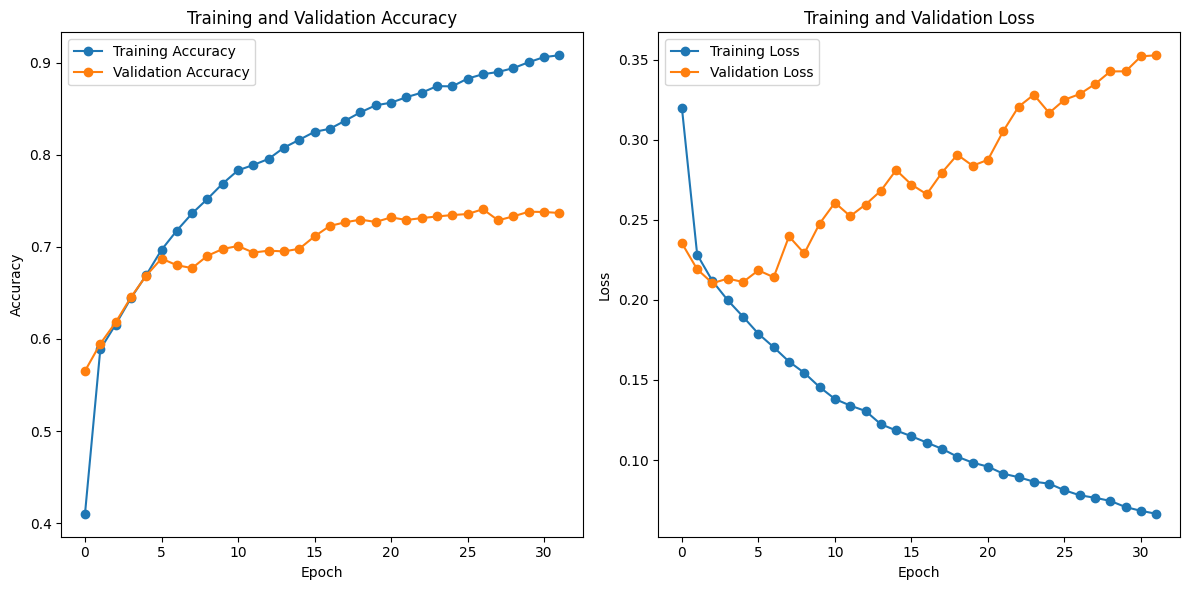

In [9]:
hlp.plot_history(history)

In [10]:
test_data_loader = hlp.create_data_loader(test_texts, test_labels, tokenizer, MAX_LEN, BATCH_SIZE)

test_acc, test_loss, test_label_actual, test_label_pred = hlp.eval_model_multi(model, test_data_loader, device)

print(f'Test Accuracy: {test_acc:.2f} Test Loss: {test_loss}')

Test Accuracy: 0.74 Test Loss: 0.35781354227183776


Accuracy: 0.74
F1 Score: 0.73
Precision: 0.73
Recall: 0.74

Classification Report:
                    precision    recall  f1-score   support

        Disability       0.45      0.07      0.12       454
     Gender/Sexual       0.70      0.77      0.73      3160
Origin/Nationality       0.23      0.48      0.31        62
    Race/Ethnicity       0.76      0.75      0.75      3461
          Religion       0.79      0.80      0.79      3117

          accuracy                           0.74     10254
         macro avg       0.58      0.57      0.54     10254
      weighted avg       0.73      0.74      0.73     10254



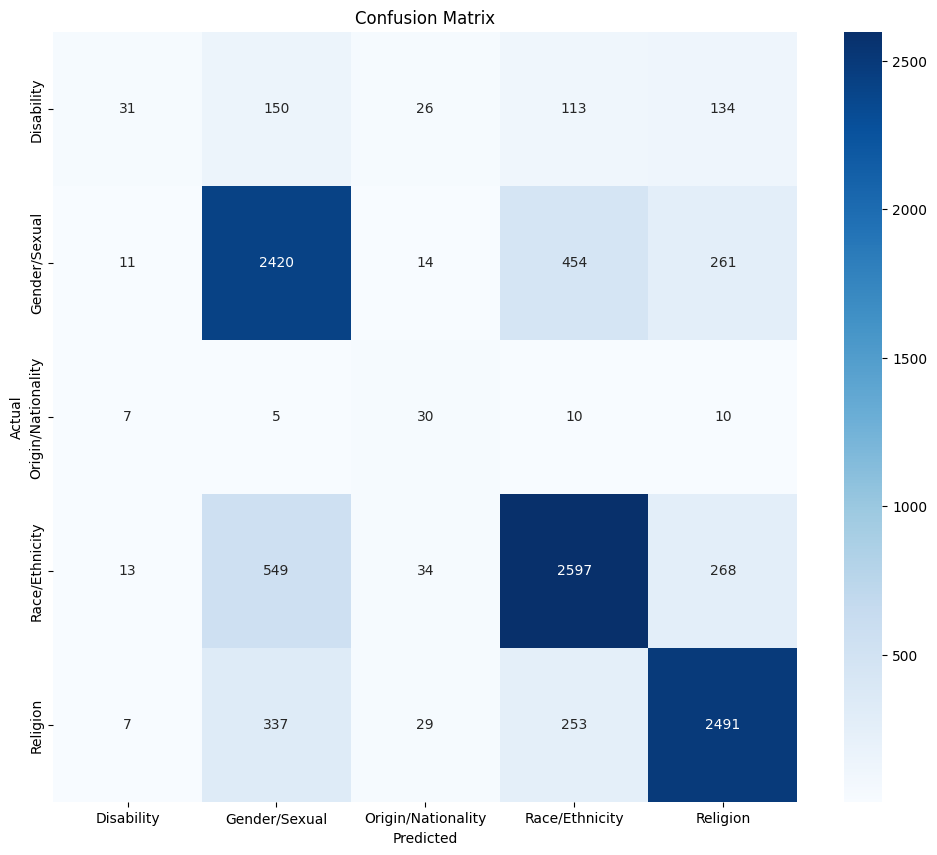

In [11]:
hlp.plot_confusion_matrix(np.argmax(test_label_actual, axis=1), np.argmax(test_label_pred, axis=1), class_names)

In [12]:
test_texts = ["This is the sort of thing that happens in a shithole country. @URL"]
preds, confidence = hlp.predict(test_texts, model, tokenizer, MAX_LEN, device)

index = list(confidence[0]).index(np.array(confidence[0]).max())

print(f"The predicted class is: {class_names[index]} with confidence: {confidence[0][index]:.2f}")

The predicted class is: Origin/Nationality with confidence: 1.00
